### Data cleaning

In real world datasets, we come across lot of data quality problems which we sometimes refer as noise. The presence of noise hampers the data processing steps. Some other issues with data are outliers (data different than most of the other data objects in the data set), it interferes the most with the data analysis. There can be missing values, duplicate data or even wrong, inaccurate or fake data.
Therefore, to work with real world dataset we need to do data cleaning.

Some of the techniques for data cleaning are as follows:
1. Handling missing or incomplete data: Missing data can arise as a result of inconsistent data deletion, diregarding data filling in the first place, updation to the historical data and so on. Ignore the missing values if not useful, fill in missing values manually (tedious and infeasible) or automatically with global constant value, replace with central tendency of the data (mean/median, when data is skewed use median to avoid outlier values affecting the mean). It is actually better if the data is filled correctly in the first place by making some fields manadatory and hence future proofing it.
2. Noisy data like random error or variance in a measured variable, say salary is -1. Noisy data might occure due to faulty data collection, data entry issues, data tranmission problems or even technology limitation like one data format gives 3 decimals and other may be 15 decimals.  To handle noisy data generally binning methods are used to smooth the data, outlier detection and removal, another method is to smooth data using regression functions.

Other processes and tools are:
- Use metadata (data about data) (e.g., domain, range, dependency, distribution) – example: what are acceptable values of age by having a valid range specified
- Check field overloading – happens when developers try to squeeze in the data. Example, 32 bits squeezed into 8 bits, mainly development issues
- Check uniqueness rule, consecutiveness rule (no missing values between the lowest and highest values, example, ticket number to be consecutive) , null rule(how to handle empty values, question marks, etc.) for the attributes
- Use tools for data scrubbing and data auditing – uses domain knowledge to automatically detect discrepancies in the dataset
- Use data migration tools – allow transformations to be specified – replace date formats, currencies, etc.
- ETL (extraction/transformation/loading) tools: allow users to specify transformations using GUI

### Below are some examples in python for data cleaning

Remove fields that refer to internal processes at the British Library and do not describe the books themselves (Corporate Author, Corporate Contributors, Issuance type, Former owner, Shelfmarks, Engraver).Clean data in column Date of Publication, as to remove the extra dates in square brackets (e.g. 1879 [1878] -> 1879) and convert date ranges to their start date, wherever present (e.g. 1860-63 -> 1860)

In [3]:
import pandas as pd
import re

#read the csv file
df = pd.read_csv('./BL_books.csv')
df.columns = ['Identifier','Edition Statement','Place of Publication','Date of Publication','Publisher','Title',
                'Author','Contributors','Corporate Author','Corporate Contributors','Former owner',
                'Engraver','Issuance type','Flickr URL','Shelfmarks']

#Inspect the data and describe any issues observed
print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))
print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

#Remove fields that refer to internal processes at the British Library 
df = df.drop(['Corporate Author','Corporate Contributors','Former owner','Engraver','Issuance type','Shelfmarks'],
             axis=1)

#Clean data in column Date of Publication
df['Date of Publication'] = df['Date of Publication'].str.extract(r'(\d{4})')
df.head() #default is to show 5 rows, we can change it by using data.head(2) to show 2 rows

Number of instances = 8287
Number of attributes = 15
Number of missing values:
	Identifier: 0
	Edition Statement: 7514
	Place of Publication: 0
	Date of Publication: 181
	Publisher: 4195
	Title: 0
	Author: 1778
	Contributors: 0
	Corporate Author: 8287
	Corporate Contributors: 8287
	Former owner: 8286
	Engraver: 8287
	Issuance type: 0
	Flickr URL: 0
	Shelfmarks: 0


,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Flickr URL
0,206,NaN,London,1879,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",http://www.flickr.com/photos/britishlibrary/ta...
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",http://www.flickr.com/photos/britishlibrary/ta...
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",http://www.flickr.com/photos/britishlibrary/ta...
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",http://www.flickr.com/photos/britishlibrary/ta...
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",http://www.flickr.com/photos/britishlibrary/ta...


Load the CSV file country-income.csv which includes both numerical and categorical values. Perform data cleaning in order to replace any NaN values with the mean of the value for a given field. Then replace any categorical labels with numerical labels. Display the resulting dataset. 

In [5]:
import pandas as pd

#Load the CSV file country-income.csv which includes both numerical and categorical values
df = pd.read_csv('./country-income.csv')
df.columns = ['Region','Age','Income','Online Shopper']

#Print the number of missing values for each attribute
print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))
    
#Data cleaning in order to replace any NaN values with the mean of the value for a given field
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Income'] = df['Income'].fillna(df['Income'].mean())

#Replace any categorical labels with numerical labels

#Print the number of regions and their counts in the dataset
noOfRegions = df['Region'].value_counts()
print('\nNumber of regions: \n{}'.format(noOfRegions))

#country code numbers have been chosen to map the region to numerical value
#for the online shopper as Yes or No, 1 and 0 has been chosen respectively
map_dict = {'Region':{'India':91,'Brazil':55,'USA':1},'Online Shopper':{'Yes':1,'No':0}} 
df.replace(map_dict,inplace=True)

#Display the resulting dataset
df

Number of missing values:
	Region: 0
	Age: 0
	Income: 0
	Online Shopper: 0

Number of regions: 
India     4
USA       3
Brazil    3
Name: Region, dtype: int64


,Region,Age,Income,Online Shopper
0,91,49,86400,0
1,55,32,57600,1
2,1,35,64800,0
3,55,43,73200,0
4,1,45,79400,1
5,91,40,69600,1
6,55,46,62400,0
7,91,53,94800,1
8,1,55,99600,0
9,91,42,80400,1


Clean some more data in the Wisconsin cancer dataset

In [6]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data = data.drop(['Sample code'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data #default is to show 5 rows, we can change it by using data.head(2) to show 2 rows

Number of instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [7]:
import numpy as np

#the dataset has the missing values are encoded as '?', which we will convert to not a number(NaN)
data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


In [8]:
#As we can see above Bare Nuclei has missing values so we will replace it with median 
# (remember if data is skewed we use median instead of mean)
data2 = data['Bare Nuclei']

print('Before replacing missing values:')
print(data2[20:25])
data2 = data2.fillna(data2.median())

print('\nAfter replacing missing values:')
print(data2[20:25])

Before replacing missing values:
20     10
21      7
22      1
23    NaN
24      1
Name: Bare Nuclei, dtype: object

After replacing missing values:
20     10
21      7
22      1
23    1.0
24      1
Name: Bare Nuclei, dtype: object


In [9]:
#Another common method is to discard the data containing missing values, this might not be a good approach
# however if dropping the data is acceptable and does not hamper any prcoessing it can be applied
print('Number of rows in original data = %d' % (data.shape[0]))

data2 = data.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

Number of rows in original data = 699
Number of rows after discarding missing values = 683


Let us now try to check if there are any outliers in the data, which can be discarded. Boxplot can be used as a visualization tool to check the number of outliers

<AxesSubplot:>

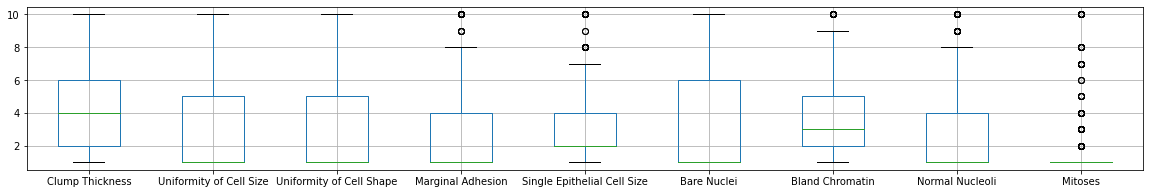

In [10]:
data2 = data.drop(['Class'],axis=1)
#convert to numeric values
data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'])
data2.boxplot(figsize=(20,3)) #figsize =(width, height) in inches

The boxplots suggest that only 5 of the columns (Marginal Adhesion, Single Epithetial Cell Size, Bland Cromatin, Normal Nucleoli, and Mitoses) contain abnormally high values. To discard the outliers, we can compute the Z-score for each attribute and remove those instances containing attributes with abnormally high or low Z-score (e.g., if Z > 3 or Z <= -3).

The following code shows the results of standardizing the columns of the data. Note that missing values (NaN) are not affected by the standardization process.

In [11]:
Z = (data2-data2.mean())/data2.std() #calculating the z-score, (value-mean)/standard deviation
Z[20:25] #display only certain rows to show the NaN value not affected 

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.771569,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.948266,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,NaN,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666


In [12]:
#discarding columns with Z > 3 or Z <= -3.
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

#sum(axis=1) means sum will be done on the rows for all the 9 columns
Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))


Number of rows before discarding outliers = 699
Number of rows after discarding missing values = 632


Some datasets, especially those obtained by merging multiple data sources, may contain duplicates or near duplicate instances. The term deduplication is often used to refer to the process of dealing with duplicate data issues. In the following example, we first check for duplicate instances in the breast cancer dataset.

In [13]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data.loc[[11,28]]

Number of duplicate rows = 236


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
11,2,1,1,1,2,1,2,1,1,2
28,2,1,1,1,2,1,2,1,1,2


The duplicated() function will return a Boolean array that indicates whether each row is a duplicate of a previous row in the table. The results suggest there are 236 duplicate rows in the breast cancer dataset. For example, the instance with row index 11 has identical attribute values as the instance with row index 28. Although such duplicate rows may correspond to samples for different individuals, in this hypothetical example, we assume that the duplicates are samples taken from the same individual and illustrate below how to remove the duplicated rows.

In [14]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data_deduplicated = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data_deduplicated.shape[0]))

Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 463
